In [ ]:
pip install -U imbalanced-learn

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import entropy
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Encode categorical variables
encoder = LabelEncoder()
X['Geography'] = encoder.fit_transform(X['Geography'])
X['Gender'] = encoder.fit_transform(X['Gender'])

#Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

# -----------------------
# Logistic Regression
# -----------------------
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_log) * 100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# -----------------------
# K-Nearest Neighbors
# -----------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Accuracy:", round(accuracy_score(y_test, y_pred_knn) * 100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# -----------------------
# Random Forest
# -----------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# -----------------------
# AdaBoost
# -----------------------
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Accuracy:", round(accuracy_score(y_test, y_pred_ada) * 100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

# -----------------------
# Decision Tree
# -----------------------
print("\n\nDecision Tree")
# Function to calculate entropy of a dataset
def calculate_entropy(y):
    probs = np.bincount(y) / len(y)
    return entropy(probs, base=2)

# Function to calculate the information gain for each feature
def calculate_information_gain(X, y, feature):
    # Calculate the total entropy of the target variable
    total_entropy = calculate_entropy(y)

    # Get the unique values of the feature
    feature_values = X[feature].unique()

    # Calculate the weighted sum of the entropies of each subset of data
    weighted_entropy = 0
    for value in feature_values:
        subset_y = y[X[feature] == value]
        weighted_entropy += (len(subset_y) / len(y)) * calculate_entropy(subset_y)

    # Information gain is the difference between the total entropy and the weighted entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate entropy of the target variable
total_entropy = calculate_entropy(y)

# Dictionary to store information gain and entropy for each feature
feature_info_gain = {}

# Loop through each feature to calculate its information gain
for feature in X.columns:
    info_gain = calculate_information_gain(X, y, feature)
    feature_info_gain[feature] = info_gain

# Display information gain for each feature
print("\nInformation Gain for each feature:")
for feature, gain in feature_info_gain.items():
    print(f"{feature}: {gain:.4f}")

# Train Decision Tree Classifier with 'entropy' criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
dec_y_pred = clf.predict(X_test)
#Roc curve probabilities
dec_y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, dec_y_pred)
cm = confusion_matrix(y_test, dec_y_pred)

print(f"\nDecision Tree Classifier Accuracy (using entropy): {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(cm)

# ----------------------------
# Support Vector Machine
# ----------------------------

# Train SVM with linear kernel
svm_model = SVC(kernel='linear',probability=True)
svm_model.fit(X_train, y_train)

# Predictions
svm_y_pred = svm_model.predict(X_test)
svm_y_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nSVM Accuracy:", accuracy_score(y_test, svm_y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test,svm_y_pred))



Logistic Regression Accuracy: 71.05 %
Confusion Matrix:
 [[1150  457]
 [ 122  271]]

KNN Accuracy: 74.45 %
Confusion Matrix:
 [[1232  375]
 [ 136  257]]

Random Forest Accuracy: 84.0 %
Confusion Matrix:
 [[1444  163]
 [ 157  236]]

AdaBoost Accuracy: 79.85 %
Confusion Matrix:
 [[1304  303]
 [ 100  293]]


Decision Tree

Information Gain for each feature:
CreditScore: 0.0385
Geography: 0.0202
Gender: 0.0082
Age: 0.1072
Tenure: 0.0010
Balance: 0.5194
NumOfProducts: 0.1009
HasCrCard: 0.0000
IsActiveMember: 0.0177
EstimatedSalary: 0.7293

Decision Tree Classifier Accuracy (using entropy): 78.30%
Confusion Matrix:
[[1345  262]
 [ 172  221]]

SVM Accuracy: 71.2
Confusion Matrix:
 [[1154  453]
 [ 123  270]]


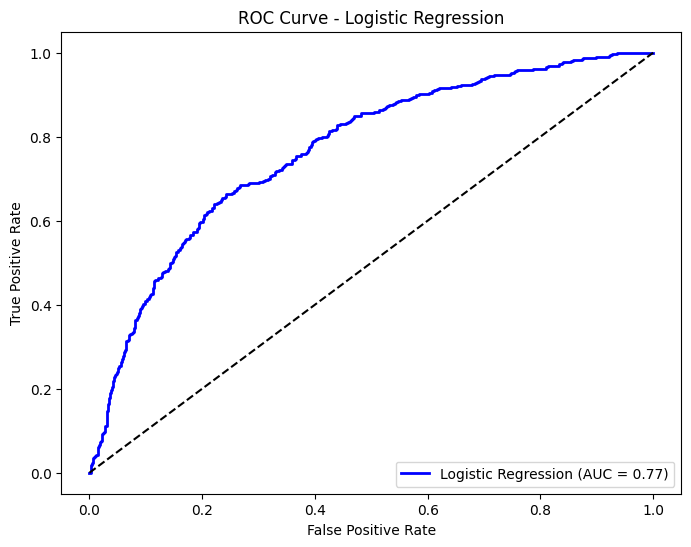

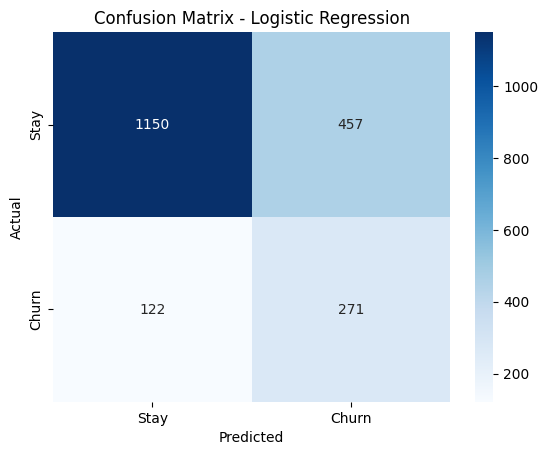


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000



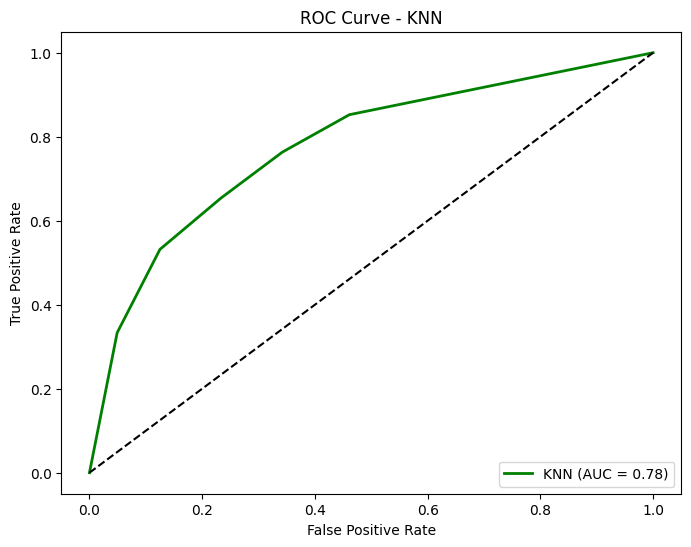

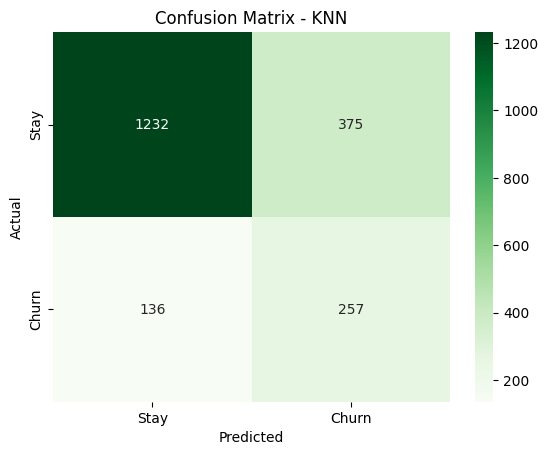


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1607
           1       0.41      0.65      0.50       393

    accuracy                           0.74      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.74      0.76      2000



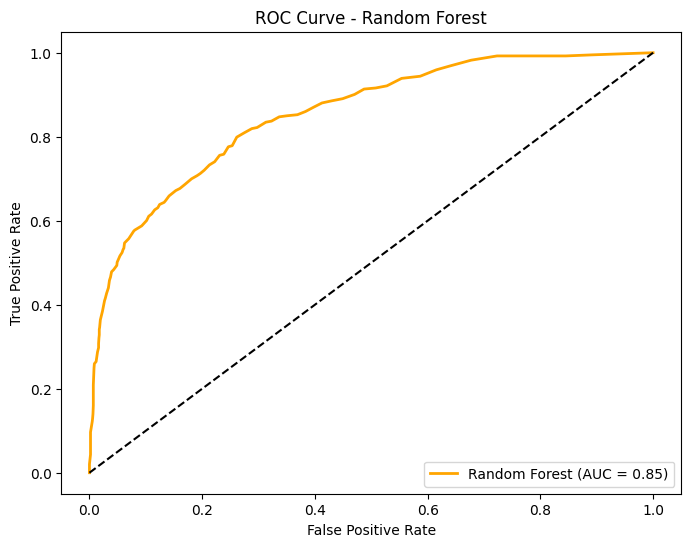

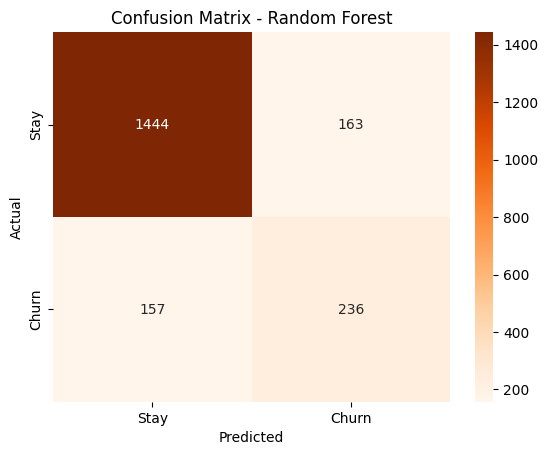


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.60      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



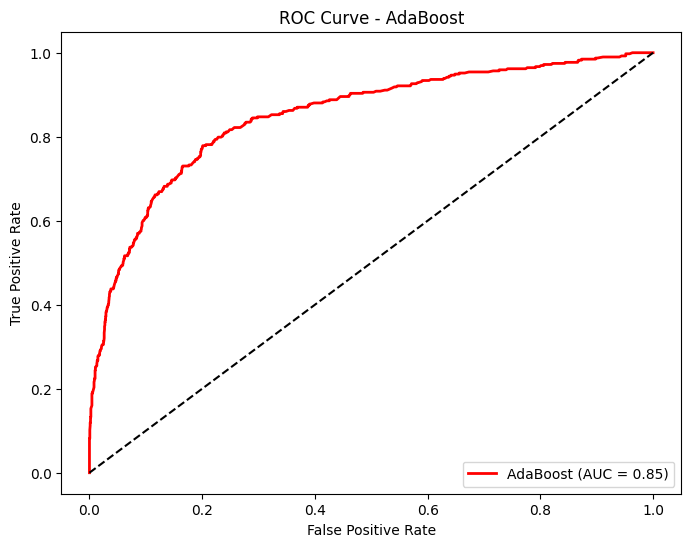

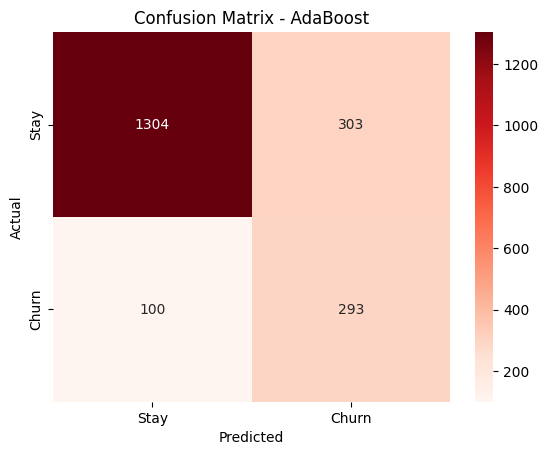


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1607
           1       0.49      0.75      0.59       393

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



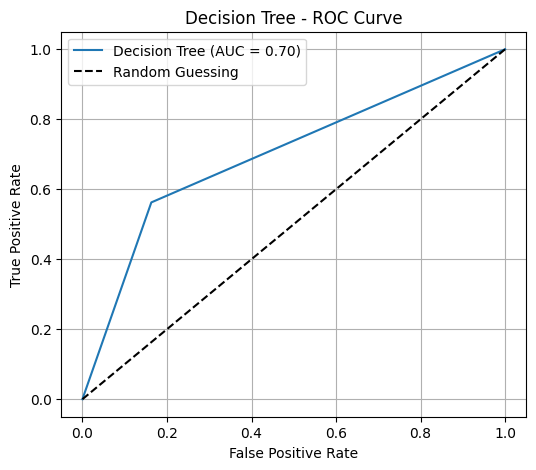

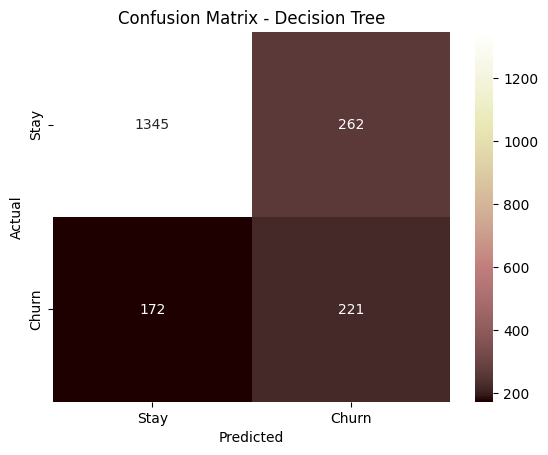


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1607
           1       0.46      0.56      0.50       393

    accuracy                           0.78      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.78      0.79      2000



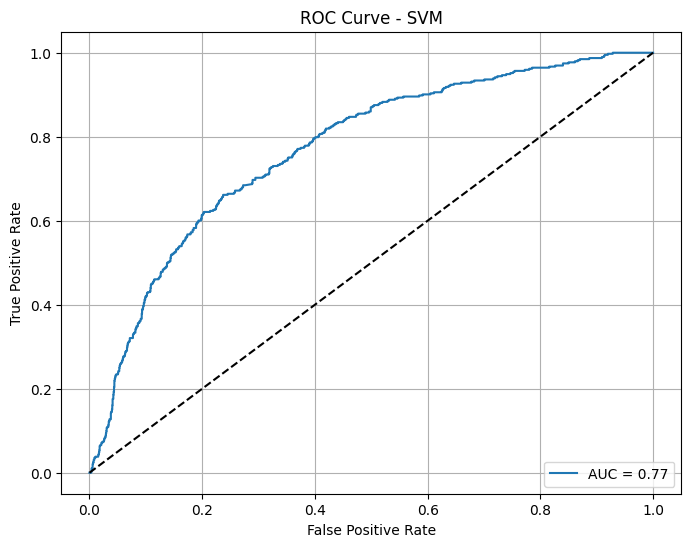

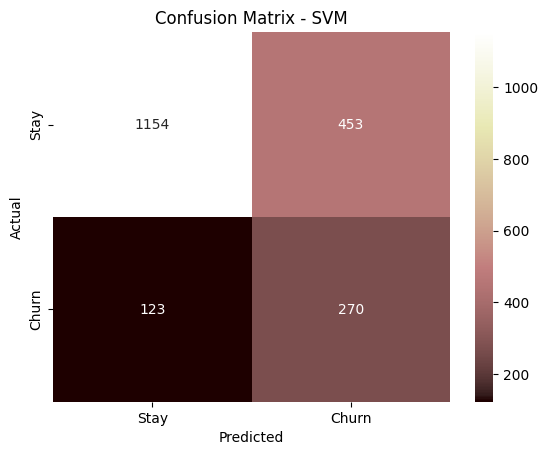

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, auc, roc_curve,roc_auc_score
# -----------------------------------
# Logistic Regression - ROC and Confusion Matrix
# -----------------------------------

fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# -----------------------------------
# KNN - ROC and Confusion Matrix
# -----------------------------------

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# -----------------------------------
# Random Forest - ROC and Confusion Matrix
# -----------------------------------
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
# -----------------------------------
# AdaBoost - ROC and Confusion Matrix
# -----------------------------------

fpr_ada, tpr_ada, _ = roc_curve(y_test, ada.predict_proba(X_test)[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='red', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc='lower right')
plt.show()

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Reds', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))


# ------------------------------------------
# Decision Tree -  ROC and Confusion Matrix
# ------------------------------------------

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dec_y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

cm_dec = confusion_matrix(y_test, dec_y_pred)
sns.heatmap(cm_dec, annot=True, fmt='d', cmap='pink', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, dec_y_pred))

# -------------------------------------------------------------------------
# Support Vector Machine -  ROC , Confusion Matrix and Classification Report
# --------------------------------------------------------------------------

roc_auc = roc_auc_score(y_test, svm_y_proba)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

cm_svm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='pink', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:\n", classification_report(y_test, svm_y_pred))

In [ ]:
# -----------------------
# Prediction for New Customer
# -----------------------
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
            'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Example customer: France (0), Female (0)
#fixednew_customer = pd.DataFrame([[450, 1, 1, 58, 1, 150000, 1, 0, 0, 100000]], columns=features)
#OGnew_customer = pd.DataFrame([[600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]], columns=features)

#hargrave france rownumber 1 in csv
#new_customer = pd.DataFrame([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88]], columns=features)

# Kay – France (0), Female (0) serial 13
new_customer= pd.DataFrame([[476, 0, 0, 34, 10, 0.0, 2, 1, 0, 26260.98]], columns=features)

new_customer_scaled = scaler.transform(new_customer)

# Predictions
print("\nPredictions for New Customer:")
print("Logistic Regression:", "Churn" if log_reg.predict(new_customer_scaled)[0] == 1 else "Stay")
print("KNN:", "Churn" if knn.predict(new_customer_scaled)[0] == 1 else "Stay")
print("Random Forest:", "Churn" if rf.predict(new_customer_scaled)[0] == 1 else "Stay")
print("AdaBoost:", "Churn" if ada.predict(new_customer_scaled)[0] == 1 else "Stay")
print("Decision Tree:", "Churn" if clf.predict(new_customer_scaled)[0] == 1 else "Stay")
print("SVM:", "Churn" if svm_model.predict(new_customer_scaled)[0] == 1 else "Stay")



Predictions for New Customer:
Logistic Regression: Stay
KNN: Stay
Random Forest: Stay
AdaBoost: Stay
Decision Tree: Stay
SVM: Stay
